# Segmentation - Cluster Analysis

#### Parthipan V - D18025

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
from sklearn.cluster import KMeans

In [85]:
data = pd.read_excel('Segmentation Exercise Data.xlsx', sheet_name='Cluster Analysis Data', index_col='caseid')

In [86]:
data.shape

(2158, 45)

In [87]:
data.head()

,s1,s2,s4a,s4cus,q3ba,q3bb,q3bc,q3bd,vq15b1,vq15b2,...,vq15b28,vq15b29,vq15b30,vq15b31,vq15b32,vq15b33,vq15b34,vq15b35,vq15b36,vq15b37
caseid,,,,,,,,,,,,,,,,,,,,,
11312,3,2,1,9,3,31,1,2,1,0,...,0,0,0,0,1,0,1,0,0,0
20336,6,1,2,10,3,11,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
35752,6,1,4,11,22,9,1,8,1,1,...,0,0,0,1,1,1,1,0,0,0
42917,6,1,2,13,3,13,1,2,1,1,...,0,0,0,0,1,0,1,0,0,0
81246,6,2,1,12,11,26,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


In [88]:
data.columns

Index(['s1', 's2', 's4a', 's4cus', 'q3ba', 'q3bb', 'q3bc', 'q3bd', 'vq15b1',
       'vq15b2', 'vq15b3', 'vq15b4', 'vq15b5', 'vq15b6', 'vq15b7', 'vq15b8',
       'vq15b9', 'vq15b10', 'vq15b11', 'vq15b12', 'vq15b13', 'vq15b14',
       'vq15b15', 'vq15b16', 'vq15b17', 'vq15b18', 'vq15b19', 'vq15b20',
       'vq15b21', 'vq15b22', 'vq15b23', 'vq15b24', 'vq15b25', 'vq15b26',
       'vq15b27', 'vq15b28', 'vq15b29', 'vq15b30', 'vq15b31', 'vq15b32',
       'vq15b33', 'vq15b34', 'vq15b35', 'vq15b36', 'vq15b37'],
      dtype='object')

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2158 entries, 11312 to 711998232
Data columns (total 45 columns):
s1         2158 non-null int64
s2         2158 non-null int64
s4a        2158 non-null int64
s4cus      2158 non-null int64
q3ba       2158 non-null int64
q3bb       2158 non-null int64
q3bc       2158 non-null int64
q3bd       2158 non-null int64
vq15b1     2158 non-null int64
vq15b2     2158 non-null int64
vq15b3     2158 non-null int64
vq15b4     2158 non-null int64
vq15b5     2158 non-null int64
vq15b6     2158 non-null int64
vq15b7     2158 non-null int64
vq15b8     2158 non-null int64
vq15b9     2158 non-null int64
vq15b10    2158 non-null int64
vq15b11    2158 non-null int64
vq15b12    2158 non-null int64
vq15b13    2158 non-null int64
vq15b14    2158 non-null int64
vq15b15    2158 non-null int64
vq15b16    2158 non-null int64
vq15b17    2158 non-null int64
vq15b18    2158 non-null int64
vq15b19    2158 non-null int64
vq15b20    2158 non-null int64
vq15b21    2158 

In [90]:
data.describe()

,s1,s2,s4a,s4cus,q3ba,q3bb,q3bc,q3bd,vq15b1,vq15b2,...,vq15b28,vq15b29,vq15b30,vq15b31,vq15b32,vq15b33,vq15b34,vq15b35,vq15b36,vq15b37
count,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,...,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000
mean,4.062558,1.547266,2.511585,9.068119,9.747451,17.944393,3.056997,3.185357,0.895737,0.875811,...,0.031974,0.120019,0.031047,0.235867,0.696942,0.190454,0.507878,0.158480,0.074143,0.049583
std,1.602119,0.497876,1.351729,2.177879,12.725142,16.621524,5.946368,5.117890,0.305673,0.329874,...,0.175972,0.325059,0.173486,0.424638,0.459687,0.392750,0.500054,0.365275,0.262064,0.217132
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,7.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,2.000000,10.000000,6.000000,13.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,4.000000,11.000000,11.000000,22.000000,2.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,6.000000,2.000000,4.000000,14.000000,106.000000,126.000000,131.000000,106.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Generating 20 KMeans clusters of each with no of clusters ranging form 1 to 20:

In [91]:
distance = []
cl = range(1,20)
for i in cl:
    kmeans = KMeans(n_clusters= i)
    kmeans = kmeans.fit(data)
    distance.append(kmeans.inertia_)

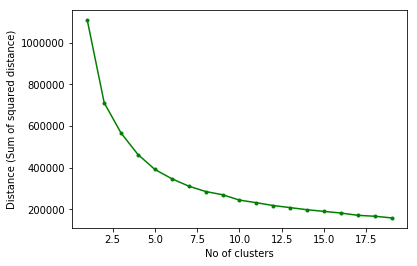

In [92]:
# plotting the no of clusters vs distance
plt.plot(cl, distance, 'g.-')
plt.xlabel('No of clusters')
plt.ylabel('Distance (Sum of squared distance)')
plt.show()

Optimal no of cluster is considered as 6 in this case.

In [93]:
# clusters as 6
kmeans = KMeans(n_clusters=6)

# fitting the same in the data:
kmeans = kmeans.fit(data)



In [94]:
#kmeans.cluster_centers_

### Creating a dataframe for containig all clusters numbers (6 clusters 0 to 5):

In [95]:
clusters = pd.DataFrame()
clusters['index_of_data'] = data.index.values
clusters['cluster_no'] = kmeans.labels_

In [96]:
clusters

,index_of_data,cluster_no
0,11312,0
1,20336,4
2,35752,5
3,42917,4
4,81246,0
5,100622,5
6,101296,4
7,136376,0
8,136584,0
9,139352,4


In [97]:
cluster1 = data.loc[clusters[clusters['cluster_no'] == 0]['index_of_data'].values,:]
cluster2 = data.loc[clusters[clusters['cluster_no'] == 1]['index_of_data'].values,:]
cluster3 = data.loc[clusters[clusters['cluster_no'] == 2]['index_of_data'].values,:]
cluster4 = data.loc[clusters[clusters['cluster_no'] == 3]['index_of_data'].values,:]
cluster5 = data.loc[clusters[clusters['cluster_no'] == 4]['index_of_data'].values,:]
cluster6 = data.loc[clusters[clusters['cluster_no'] == 5]['index_of_data'].values,:]

In [98]:
cluster1.head()

,s1,s2,s4a,s4cus,q3ba,q3bb,q3bc,q3bd,vq15b1,vq15b2,...,vq15b28,vq15b29,vq15b30,vq15b31,vq15b32,vq15b33,vq15b34,vq15b35,vq15b36,vq15b37
caseid,,,,,,,,,,,,,,,,,,,,,
11312,3,2,1,9,3,31,1,2,1,0,...,0,0,0,0,1,0,1,0,0,0
81246,6,2,1,12,11,26,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
136376,6,1,1,10,11,21,1,4,1,1,...,0,0,0,0,1,0,0,0,0,0
136584,3,2,1,13,3,21,1,2,1,1,...,0,0,0,0,0,0,1,0,1,0
199277,3,1,1,11,3,31,1,2,1,1,...,0,0,0,1,0,0,1,0,0,0


In [99]:
cluster1.describe()

,s1,s2,s4a,s4cus,q3ba,q3bb,q3bc,q3bd,vq15b1,vq15b2,...,vq15b28,vq15b29,vq15b30,vq15b31,vq15b32,vq15b33,vq15b34,vq15b35,vq15b36,vq15b37
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,...,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,4.202946,1.531915,2.546645,9.219313,5.602291,21.371522,2.520458,2.631751,0.913257,0.883797,...,0.036007,0.126023,0.021277,0.216039,0.756137,0.207856,0.561375,0.162029,0.072013,0.037643
std,1.535821,0.499389,1.342508,2.097857,4.286914,5.237423,4.002559,2.421943,0.281689,0.320731,...,0.186459,0.332147,0.144423,0.411879,0.429763,0.406106,0.496625,0.368780,0.258721,0.190488
min,1.000000,1.000000,1.000000,4.000000,1.000000,14.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,7.000000,2.000000,16.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,2.000000,10.000000,4.000000,21.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,4.000000,11.000000,8.000000,25.000000,2.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,6.000000,2.000000,4.000000,14.000000,17.000000,31.000000,41.000000,20.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Description of each clusters for only the variables s1, s2, s4a, s4cus, q3ba, q3bb, q3bc, q3bd:

In [100]:
cluster1[['s1', 's2', 's4a', 's4cus', 'q3ba', 'q3bb', 'q3bc', 'q3bd']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s1,611.0,4.202946,1.535821,1.0,3.0,4.0,5.0,6.0
s2,611.0,1.531915,0.499389,1.0,1.0,2.0,2.0,2.0
s4a,611.0,2.546645,1.342508,1.0,1.0,2.0,4.0,4.0
s4cus,611.0,9.219313,2.097857,4.0,7.0,10.0,11.0,14.0
q3ba,611.0,5.602291,4.286914,1.0,2.0,4.0,8.0,17.0
q3bb,611.0,21.371522,5.237423,14.0,16.0,21.0,25.0,31.0
q3bc,611.0,2.520458,4.002559,1.0,1.0,1.0,2.0,41.0
q3bd,611.0,2.631751,2.421943,1.0,1.0,2.0,3.0,20.0


In [110]:
cluster1[['s1', 's2', 's4a', 's4cus', 'q3ba', 'q3bb', 'q3bc', 'q3bd']].mode()

,s1,s2,s4a,s4cus,q3ba,q3bb,q3bc,q3bd
0,5,2,4,7,3,21,1,1


In [101]:
cluster2[['s1', 's2', 's4a', 's4cus', 'q3ba', 'q3bb', 'q3bc', 'q3bd']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s1,40.0,3.700,1.771570,1.0,2.00,4.0,6.00,6.0
s2,40.0,1.625,0.490290,1.0,1.00,2.0,2.00,2.0
s4a,40.0,3.250,1.235168,1.0,2.75,4.0,4.00,4.0
s4cus,40.0,8.450,2.012143,6.0,7.00,7.0,10.00,13.0
q3ba,40.0,68.475,21.518016,41.0,51.00,61.0,82.25,106.0
q3bb,40.0,57.925,24.469120,1.0,49.75,51.0,71.50,106.0
q3bc,40.0,5.075,8.272250,1.0,1.00,1.0,4.00,31.0
q3bd,40.0,10.025,21.413496,1.0,1.00,3.0,6.50,106.0


In [111]:
cluster2[['s1', 's2', 's4a', 's4cus', 'q3ba', 'q3bb', 'q3bc', 'q3bd']].mode()

,s1,s2,s4a,s4cus,q3ba,q3bb,q3bc,q3bd
0,6,2,4,7,51,51,1,1


In [102]:
cluster3[['s1', 's2', 's4a', 's4cus', 'q3ba', 'q3bb', 'q3bc', 'q3bd']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s1,37.0,3.513514,1.773597,1.0,2.0,4.0,5.0,6.0
s2,37.0,1.540541,0.505228,1.0,1.0,2.0,2.0,2.0
s4a,37.0,3.243243,1.164412,1.0,3.0,4.0,4.0,4.0
s4cus,37.0,8.270270,2.063555,5.0,7.0,7.0,10.0,13.0
q3ba,37.0,10.486486,11.777147,1.0,2.0,9.0,11.0,51.0
q3bb,37.0,87.054054,16.561243,66.0,71.0,81.0,101.0,126.0
q3bc,37.0,5.702703,12.217621,1.0,1.0,1.0,4.0,51.0
q3bd,37.0,5.432432,8.936630,1.0,1.0,3.0,5.0,51.0


In [112]:
cluster3[['s1', 's2', 's4a', 's4cus', 'q3ba', 'q3bb', 'q3bc', 'q3bd']].mode()

,s1,s2,s4a,s4cus,q3ba,q3bb,q3bc,q3bd
0,5.0,2.0,4.0,7.0,1,101.0,1.0,1.0
1,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN


In [103]:
cluster4[['s1', 's2', 's4a', 's4cus', 'q3ba', 'q3bb', 'q3bc', 'q3bd']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s1,200.0,4.100,1.635043,1.0,3.0,4.0,5.0,6.0
s2,200.0,1.520,0.500854,1.0,1.0,2.0,2.0,2.0
s4a,200.0,2.915,1.313928,1.0,1.0,4.0,4.0,4.0
s4cus,200.0,8.970,2.180106,5.0,7.0,10.0,11.0,14.0
q3ba,200.0,8.390,6.681400,1.0,3.0,6.0,11.0,31.0
q3bb,200.0,41.840,7.133642,26.0,36.0,41.0,46.0,61.0
q3bc,200.0,5.570,9.142375,1.0,1.0,1.0,6.0,51.0
q3bd,200.0,5.030,7.128335,1.0,2.0,3.0,5.0,56.0


In [113]:
cluster4[['s1', 's2', 's4a', 's4cus', 'q3ba', 'q3bb', 'q3bc', 'q3bd']].mode()

,s1,s2,s4a,s4cus,q3ba,q3bb,q3bc,q3bd
0,5,2,4,7,11,41,1,2


In [104]:
cluster5[['s1', 's2', 's4a', 's4cus', 'q3ba', 'q3bb', 'q3bc', 'q3bd']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s1,1023.0,3.942326,1.632473,1.0,3.0,4.0,5.0,6.0
s2,1023.0,1.548387,0.497897,1.0,1.0,2.0,2.0,2.0
s4a,1023.0,2.282502,1.332037,1.0,1.0,2.0,4.0,4.0
s4cus,1023.0,9.110459,2.252747,2.0,7.0,10.0,11.0,14.0
q3ba,1023.0,5.497556,4.463786,1.0,2.0,4.0,7.0,21.0
q3bb,1023.0,6.669599,3.694064,1.0,3.0,6.0,11.0,13.0
q3bc,1023.0,2.451613,3.680136,1.0,1.0,1.0,2.0,51.0
q3bd,1023.0,2.266862,2.238724,1.0,1.0,2.0,3.0,25.0


In [114]:
cluster5[['s1', 's2', 's4a', 's4cus', 'q3ba', 'q3bb', 'q3bc', 'q3bd']].mode()

,s1,s2,s4a,s4cus,q3ba,q3bb,q3bc,q3bd
0,5,2,1,7,3,11,1,1


In [105]:
cluster6[['s1', 's2', 's4a', 's4cus', 'q3ba', 'q3bb', 'q3bc', 'q3bd']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s1,247.0,4.323887,1.489924,1.0,4.0,5.0,5.0,6.0
s2,247.0,1.591093,0.492630,1.0,1.0,2.0,2.0,2.0
s4a,247.0,2.817814,1.314091,1.0,1.0,4.0,4.0,4.0
s4cus,247.0,8.817814,2.047010,4.0,7.0,9.0,10.0,13.0
q3ba,247.0,29.080972,10.305571,16.0,21.0,26.0,31.0,73.0
q3bb,247.0,19.987854,10.817586,1.0,11.0,21.0,26.0,41.0
q3bc,247.0,4.133603,10.173014,1.0,1.0,1.0,2.0,131.0
q3bd,247.0,5.421053,6.956371,1.0,1.0,3.0,6.0,41.0


In [115]:
cluster6[['s1', 's2', 's4a', 's4cus', 'q3ba', 'q3bb', 'q3bc', 'q3bd']].mode()

,s1,s2,s4a,s4cus,q3ba,q3bb,q3bc,q3bd
0,5,2,4,7,21,21,1,1
